In [1]:
import warnings
from pathlib import Path

import gensim

# Widgets
import ipywidgets as widgets
import nltk
import pandas as pd
import pyLDAvis.gensim_models
import spacy
from gensim import corpora
from IPython.core.interactiveshell import InteractiveShell
from IPython.display import display
from ipywidgets import interact
from matplotlib import pyplot as plt
from nltk.corpus import stopwords

# Pakete für NLP
from wordcloud import WordCloud

InteractiveShell.ast_node_interactivity = "all"

nltk.download("stopwords")  # start the NLTK Downloader and download the stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/sebastianh/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# LDA and WordCloud on Mastodon Posts for the Bavarian State Election!

## Loading the data from Parquet File


In [3]:
toots_path = Path() / "german_toots_small.pqt"
german_sentiment_df = pd.read_parquet(toots_path)
german_sentiment_df

,date,day,week,mentioned_party,dominant_party,cleared_content,sentiment
0,2023-08-29 15:38:00,241,35,fw,fw,In der Flugblattaffäre sind noch immer viele F...,-0.000564
1,2023-08-29 15:01:57,241,35,"csu, fw",fw,Fall jemand meinen uralten Schulranzen im Anti...,-0.944469
2,2023-08-29 14:55:55,241,35,fw,fw,"7/ Oh, die FW haben 14% in Bayern und die noAF...",-0.029815
3,2023-08-29 14:52:09,241,35,"csu, fw",fw,"andreas Picasso Na, dann kann ich es mir ja sp...",-0.964399
4,2023-08-29 14:17:28,241,35,fw,fw,Hinter solchen Flugblatt­aktionen stecke also ...,-0.004730
...,...,...,...,...,...,...,...
5596,2023-11-18 19:00:36,322,46,afd,afd,RT by TerryReintke : Eine überfallartig gekape...,-0.002703
5597,2023-11-18 20:08:06,322,46,afd,afd,"MuHa, großdeutscher AfD - NAZIPuff im bayrisch...",-0.427801
5598,2023-11-18 20:55:02,322,46,linke,linke,risa spirelli mich nervt es auch das man kaum ...,-0.986509
5599,2023-11-18 22:04:01,322,46,fdp,fdp,"BerlinVic Es gibt zu viele Leute, die sie wähl...",-0.010498


Use the German StopWords from NLTK

In [4]:
# remove stopwords
nltk_stop_words = set(stopwords.words("german"))  # Selecting nltk stopwords
len(nltk_stop_words)

232

Also use the German StopWords form Spacy.

In [5]:
nlp = spacy.load("de_core_news_lg")
spacy_stop_words = set(nlp.Defaults.stop_words)
len(spacy_stop_words)

543

Add some costume stop words with special characters and common verbs.

In [6]:
extra_stop_words = {
    "wird",
    "war",
    "werden",
    "hat",
    "haben",
    "nicht",
    "ist",
    "sind",
    "sein",
    "steht",
    "mal",
    "machen",
    "können",
    "ein",
    "einen",
    "noch",
    "da",
    "amp",
    "bleiben",
    "finden",
    "geben",
    "  ",
    " ",
    "",
    "”",
    "+",
    "--",
    "*",
    "&",
    "|",
    "[",
    "]",
    "/",
    "%",
    "'",
    "´´",
    '"',
}
stop_words = nltk_stop_words | spacy_stop_words | extra_stop_words
len(stop_words)

589

Convert the text in each row in a list opf words and exclude stopwords.

In [7]:
german_sentiment_without_stop_words = german_sentiment_df.cleared_content.apply(
    lambda text: " ".join([word.strip() for word in text.lower().split(" ") if word.strip() not in stop_words])
)

## Word Cloud after Removing StopWords

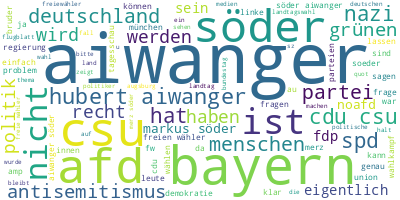

In [8]:
warnings.filterwarnings("ignore", category=DeprecationWarning)
long_string = ",".join(german_sentiment_without_stop_words)
wordcloud = WordCloud(background_color="white", max_words=100, contour_width=5, contour_color="steelblue")
wordcloud.generate(long_string)
wordcloud.to_image()

## Word Cloud after Lemmatize
Lemmatize with Spacy (https://spacy.io/models/de). Spacy uses models small to large and a BERT based model. We use *large*. 
This has to be installed via *pip* see link.
NLTK WORDNET does not work with the German language. 

In [9]:
data_words = []

for words in german_sentiment_without_stop_words:
    doc = nlp(words.lower())
    data_words.append([x.lemma_.lower() for x in doc])

# filter for stopwords after lemmatizing again, just to make sure
data_words = [[x for x in data_word if x not in stop_words] for data_word in data_words]
german_sentiment_df["lemma"] = data_words

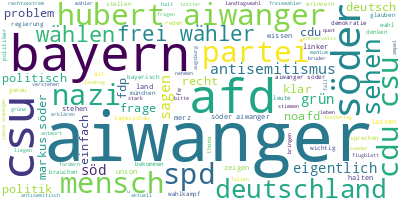

In [10]:
long_string = ",".join([x for data_word in data_words for x in data_word])
wordcloud = WordCloud(background_color="white", max_words=100, contour_width=5, contour_color="steelblue")
wordcloud.generate(long_string)
wordcloud.to_image()

## WordClouds for each Party

Text(0.5, 1.0, 'AFD - 624 posts')

(-0.5, 399.5, 199.5, -0.5)

Text(0.5, 1.0, 'CSU - 1676 posts')

(-0.5, 399.5, 199.5, -0.5)

Text(0.5, 1.0, 'FDP - 101 posts')

(-0.5, 399.5, 199.5, -0.5)

Text(0.5, 1.0, 'FW - 2621 posts')

(-0.5, 399.5, 199.5, -0.5)

Text(0.5, 1.0, 'GRUENE - 75 posts')

(-0.5, 399.5, 199.5, -0.5)

Text(0.5, 1.0, 'LINKE - 71 posts')

(-0.5, 399.5, 199.5, -0.5)

Text(0.5, 1.0, 'SPD - 197 posts')

(-0.5, 399.5, 199.5, -0.5)

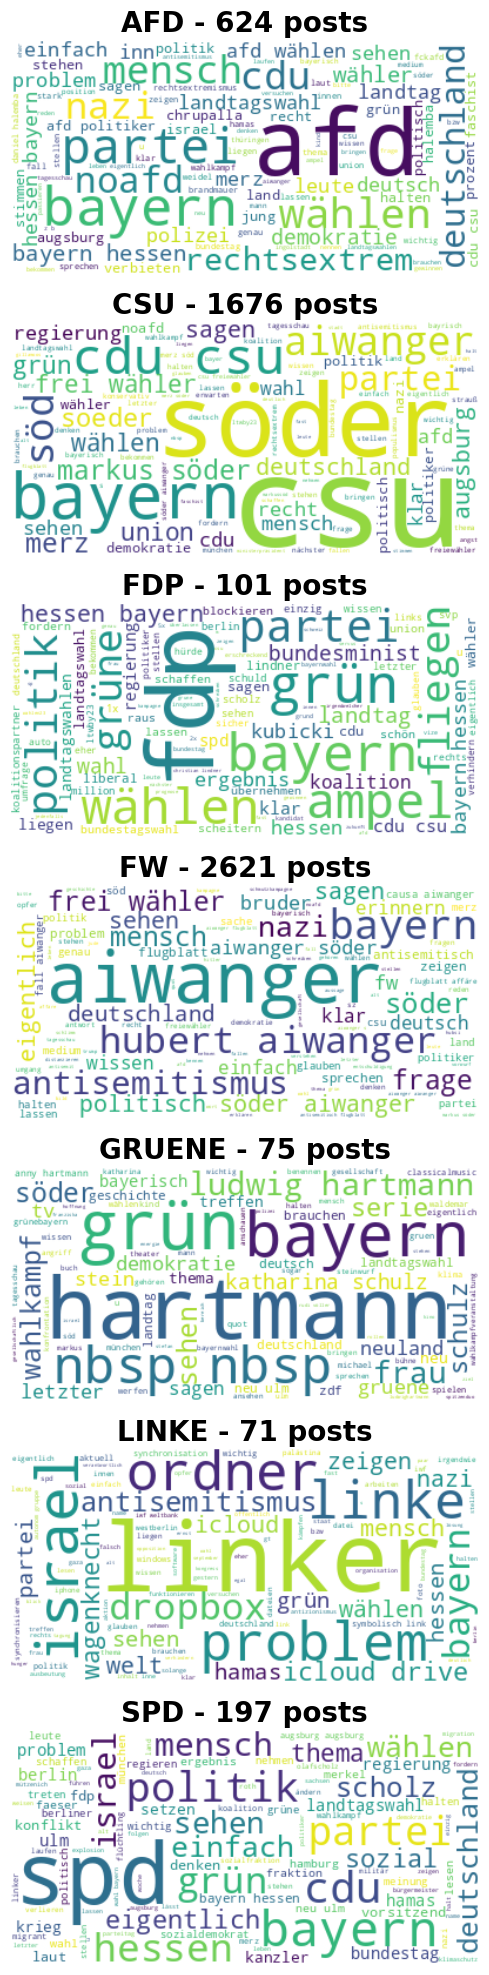

In [11]:
texts = german_sentiment_df.set_index("dominant_party").lemma
party_texts = {}
for i, v in texts.items():
    if i not in party_texts:
        party_texts[i] = [v]
    else:
        party_texts[i].append(v)
parties = set(german_sentiment_df.dominant_party)

fig, axs = plt.subplots(nrows=len(parties), ncols=1, figsize=(10, 25))

for i, party in enumerate(sorted(parties)):
    party_long_text = ",".join([word for text in party_texts[party] for word in text])
    wc = WordCloud(background_color="white", max_words=100, contour_width=5, contour_color="steelblue").generate(
        party_long_text
    )
    axs[i].imshow(wc, interpolation="bilinear")
    axs[i].set_title(f"{party.upper()} - {len(party_texts[party])} posts", fontsize=20, fontweight="bold")
    axs[i].axis("off")

plt.tight_layout()
plt.show()

In [12]:
# Quelle: https://towardsdatascience.com/topic-modeling-and-latent-dirichlet-allocation-in-python-9bf156893c24
# Create Dictionary
id2word = corpora.Dictionary(data_words)

# filter words that show up less than 15 times, more than 50% of the time and keep it to 10.000 Words
id2word.filter_extremes(no_below=15, no_above=0.50, keep_n=10000)

# Create Corpus
texts = data_words

# Term Document Frequency
# Converts a collection of words to  a list of (word_id, word_frequency) 2-tuples.
corpus = [id2word.doc2bow(text) for text in texts]

In [13]:
def get_model(
    _corpus: list, _id2word: corpora.Dictionary, _num_topics: int, random_state: float = 0
) -> gensim.models.LdaModel:
    """Get a Multicore Variant of the LDA-Model."""
    return gensim.models.LdaMulticore(corpus=_corpus, id2word=_id2word, num_topics=_num_topics, random_state=random_state)

In [14]:
pyLDAvis.enable_notebook()

In [15]:
num_topics = 15
lda_model = get_model(_corpus=corpus, _id2word=id2word, _num_topics=num_topics, random_state=2)
LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
LDAvis_prepared

PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
9      0.003949 -0.007669       1        1  9.807520
8      0.004965  0.004023       2        1  8.883380
5     -0.021404 -0.032816       3        1  7.804004
13    -0.027787 -0.013743       4        1  7.721578
11    -0.017284 -0.013351       5        1  7.178812
7      0.005165  0.014728       6        1  7.123620
10     0.039471 -0.010701       7        1  6.998561
2      0.003710 -0.011543       8        1  6.912805
12     0.051472 -0.005304       9        1  6.420286
4      0.005740  0.010202      10        1  5.846518
14     0.057017  0.022053      11        1  5.520205
1     -0.007616  0.002922      12        1  5.223776
6      0.013973  0.083403      13        1  4.970314
0     -0.008198 -0.078506      14        1  4.929581
3     -0.103173  0.036301      15        1  4.659040, topic_info=           Term         Freq        Total Category  logprob  loglift
1010   augsburg   226.000000   226.000000  Default  30.0000  30.0000
8        bayern  1176.000000  1176.000000  Default  29.0000  29.0000
137      wähler   357.000000   357.000000  Default  28.0000  28.0000
5        hubert   400.000000   400.000000  Default  27.0000  27.0000
61          csu  1368.000000  1368.000000  Default  26.0000  26.0000
...         ...          ...          ...      ...      ...      ...
125      zeigen    12.720298   170.000852  Topic15  -5.2257   0.4738
315       thema    11.749307   134.580169  Topic15  -5.3051   0.6280
82          cdu    12.872203   510.482481  Topic15  -5.2138  -0.6139
131   regierung    10.199447   120.354364  Topic15  -5.4465   0.5983
98    politisch    10.344685   245.596722  Topic15  -5.4324  -0.1009

[967 rows x 6 columns], token_table=      Topic      Freq Term
term                      
360       1  0.173597   ):
360       2  0.144664   ):
360       4  0.057866   ):
360       5  0.202530   ):
360       6  0.028933   ):
...     ...       ...  ...
516       8  0.076133    🤷
516      11  0.025378    🤷
516      13  0.025378    🤷
516      14  0.126889    🤷
516      15  0.025378    🤷

[6136 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[10, 9, 6, 14, 12, 8, 11, 3, 13, 5, 15, 2, 7, 1, 4])

## LDA - Topics

Some Topics form cluster. The main cluster consists of the topics 1-6, 8, 10, 12 (Bavaria, CSU, Söder, AFD). A smaller cluster is 7 & 9 (CSU) 

The weighting factor λ is applied to rank the terms. λ = 1, means ranking of terms in decreasing order of their *topic*-specific probability and λ = 0 ranking by lift (term probability within a topic over its marginal probability across the corpus). Meaning, λ = 1 favours total probability with the corpus and λ = 0 favours the probability with the current text (see https://nlp.stanford.edu/events/illvi2014/papers/sievert-illvi2014.pdf).

The clusters 11 (Freie Wähler, CSU), 13 (Söder, Bayern, AFD), 14 (Söder, Bayern) and 15 (Bayern) are isolated.
The most import terms are:

| Topic | Percentage | λ = 0                                                      | λ = 0.5                          | λ = 1                            |
|-------|-----------:|------------------------------------------------------------|----------------------------------|----------------------------------|
| 1     | 9.8        | Nazi, Augsburg                                             | CSU                              | CSU                              |
| 2     | 8.9        | 1, 25                                                      | Söder, CSU                       | Söder, CSU                       |
| 3     | 7.8        | Prozent                                                    | AFD, Bayern                      | AFD, Bayern                      |
| 4     | 7.7        | Hessen, Wählen (elect)                                     | Söder, Bayern                    | Söder, Bayern                    |
| 5     | 7.2        | Landtag (state parliament), Landtagswahl (state election)  | AFD, Söder, Bayern               | AFD, Söder, Bayern               |
| 6     | 7.1        | ltbwby23                                                   | CSU, Bayern                      | CSU, Bayern                      |
| 7     | 7.0        | werfen (through)                                           | CSU, Söder                       | CSU, Söder                       |
| 8     | 6.9        | *laughing emojis*, Isral, letzter (last)                   | CSU, Söder                       | CSU, Söder                       |
| 9     | 6.4        | DE, Fakt (fact)                                            | CSU                              | CSU, CDU                         |
| 10    | 5.8        | Welt (world), Opfer (victim)                               | Hubert, Söder                    | Hubert, Söder                    |
| 11    | 5.5        | Freie Wähler                                               | Freie Wähler, Hubert, CSU, Söder | Freie Wähler, CSU, Hubert, Söder |
| 12    | 5.2        | Hartmann                                                   | CSU, Bayern, AFD                 | CSU, Bayern, AFD                 |
| 13    | 5.0        | wissen (know, knowledge)                                   | Söder, Bayern, CSU               | Söder, Bayern, CSU               |
| 14    | 4.9        | Hubsi (nickname Hubert Aiwanger), Augsburg                 | Söder, Augsburg, Bayern          | Söder, Bayern                    |
| 15    | 4.7        | 2, FDP                                                     | Bayern                           | Bayern                           |

## LDA for each party with up to 15 topics

In [16]:
# Create Widgets
w_party = widgets.Select(
    options=parties,
    value="csu",
    description="Party:",
    disabled=False,
)
w_n = widgets.IntSlider(
    value=7,
    min=2,
    max=15,
    step=1,
    description="Topics:",
    disabled=False,
    continuous_update=False,
    orientation="horizontal",
    readout=True,
    readout_format="d",
)

# Display Widgets


def update(selected_party: str, _num_topics: int) -> None:
    """Event to recompute the LDA when updating the number of TOPIC and the party."""
    print(f"Selected Party: {selected_party}")
    print(f"Number of Topics: {_num_topics}")

    _id2word = corpora.Dictionary(party_texts[selected_party])
    _id2word.filter_extremes(no_below=15, no_above=0.50, keep_n=10000)

    # Term Document Frequency
    # Converts a collection of words to  a list of (word_id, word_frequency) 2-tuples.
    _corpus = [_id2word.doc2bow(text) for text in party_texts[w_party.value]]

    _lda_model = get_model(_corpus=_corpus, _id2word=id2word, _num_topics=_num_topics, random_state=2)
    lda_vis_prepared = pyLDAvis.gensim_models.prepare(_lda_model, corpus, id2word)
    display(lda_vis_prepared)


interact(update, selected_party=w_party, _num_topics=w_n)

interactive(children=(Select(description='Party:', options=('csu', 'spd', 'gruene', 'afd', 'linke', 'fdp', 'fw…

<function __main__.update(selected_party: str, _num_topics: int) -> None>